         Language                                              Links Questions
0      javascript  https://stackoverflow.com//questions/tagged/ja...   2284009
1          python  https://stackoverflow.com//questions/tagged/py...   1814484
2            java   https://stackoverflow.com//questions/tagged/java   1805546
3              c#   https://stackoverflow.com//questions/tagged/c%23    366397
4             php    https://stackoverflow.com//questions/tagged/php   1417818
5         android  https://stackoverflow.com//questions/tagged/an...   1352911
6            html   https://stackoverflow.com//questions/tagged/html   1098196
7          jquery  https://stackoverflow.com//questions/tagged/jq...   1022040
8             c++  https://stackoverflow.com//questions/tagged/c%...    740898
9             css    https://stackoverflow.com//questions/tagged/css    736092
10            ios    https://stackoverflow.com//questions/tagged/ios    662236
11          mysql  https://stackoverflow.com//questi

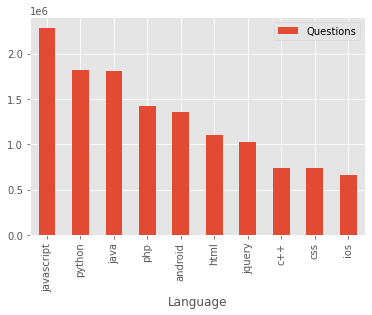

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

df = {'Language':[],'Links':[], 'Questions': []}


def n_ques(link):
    response = requests.get(link)
    content = response.content
    soup = bs(content,'html.parser')
    q = soup.find('div',class_='fs-body3 flex--item fl1 mr12 sm:mr0 sm:mb12')
    #print(q.text)
    q = (q.text).split()
    q = q[0]
    q = q.replace(',', '')
    q = int(q)
    df['Questions'].append(q)
    
def tagged(url):
    #print(url)
    response = requests.get(url)
    content = response.content
    soup = bs(content,'html.parser')
     
    for tag in soup.find_all('a',attrs={'class':'post-tag'}):
        df['Language'].append(tag.text)
        null = 'https://stackoverflow.com/'
        link = tag. get('href')
        link = null + link
        #print(link)
        df['Links'].append(link)
        n_ques(link)

# there are around 1828 pages related to this Tags, to scrape all those pages we need a lot of time and computation power, so for understanding purpose this program will scrape only the first page of tags
for i in range(1,2):
    tagged('http://stackoverflow.com/tags?page='+str(i)+'&tab=popular')

"""
# to scrape all 1828 pages run this following code, it 
for i in range(1,1829):
    extract_tagged('http://stackoverflow.com/tags?page='+str(i)+'&tab=popular')
"""

#print(df)
df = pd.DataFrame.from_dict(df, orient='index')
df = df.transpose()
print(df)

style.use('ggplot')

df.sort_values(by=['Questions'],ascending=False).head(10).set_index('Language').plot(kind='bar')
plt.show()